<a href="https://colab.research.google.com/github/NUELBUNDI/Principles_Data_Science/blob/main/Lee%20Bundi%20-%20Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels

In [ ]:
#df = pd.read_excel("http://qrc.depaul.edu/Excel_Files/Presidents.xls") #pip install xlrd
df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/soccerratings.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/chrisnjunge/DStest/master/W3Store7.csv')

In [ ]:
df.columns

In [ ]:
df

In [ ]:
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [ ]:
df.head().T

In [ ]:
df.dtypes

In [ ]:
len(df.columns)

In [ ]:
len(df['President'].unique())

In [ ]:
df.President.value_counts()

In [ ]:
df['Age at inauguration'].plot(kind='bar')

In [ ]:
#(df
 #.set_index('President')
 #['Age at inauguration']
 #.sort_values()
 #['# of electoral votes']
 #.plot(kind='barh', figsize=(8,6))
 #)

In [ ]:
df['Age at inauguration'].agg(['min', 'mean', 'max'])

In [ ]:
df['Age at inauguration'].describe()

In [ ]:
df.describe()

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
(df
 .set_index('President')
 ['Age at inauguration']
 .sort_values()
 #['# of electoral votes']
 .plot(kind='barh', figsize=(8,6))
 )

In [ ]:
(df
 ['State elected from']
 .value_counts()
 .sort_values()
 .plot(kind="barh", figsize=(6,6))
 )

In [ ]:
# missing data
((df
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

In [ ]:
# PCA
cols = ['Age at inauguration', '# of electoral votes', '# of popular votes', 'National total votes', 'Total electoral votes', 'Rating points']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [ ]:
X_pca.shape

In [ ]:
model.steps

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

In [ ]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

In [ ]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

In [ ]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

In [ ]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))

**Below you will find the code for Fridays October 8th Class.**

In [ ]:
#The following entries are based on the Soccer Ratings dataset.
# Summarize the count of values for a specific column
# You can apply this to any column in the dataframe
df.Nationality.value_counts()

In [ ]:
#Visualize the value counts
#Let's focus on the Rating column
#If your plot does not appear in the section below, uncomment the matplotlip comment below
#%matplotlib inline
df.Rating.value_counts().plot.bar()

In [ ]:
#Let's view the rating value counts as a histogram
df.Rating.hist()

In [ ]:
#Using Seaboarn we view the density of ratings as it's distributed in the data
sns.distplot(df.Rating, rug=True, rug_kws={'alpha':.2})

In [ ]:
#Using Seaboarn View a boxplot of Rating
sns.boxplot(df.Rating)

In [ ]:
#Using Seaboarn visualize a boxenplot
sns.boxenplot(df.Rating)

In [ ]:
# Visualize data in 10 equal width bins
# cut - 10 equal width bins (histogram does this)
(df
  .assign(bin=pd.cut(df.Rating, 5))
  .groupby('bin')
  .size()
  .plot.bar()
)

In [ ]:
# relationships
# continuous vs continuous
# looking at Rating and Age
df.Rating.corr(df.Age)

In [ ]:
# visualize rating versus age in a scatterplot
df.plot.scatter(x='Rating', y='Age', alpha=.95)

In [ ]:
# add a trendline
sns.lmplot('Rating', 'Age', data=df)

In [ ]:
# add skewness
sns.lmplot('Rating', 'Age', data=df, lowess=True, line_kws={'color':'red'})

In [ ]:
# add some dimensions
# here is a way to limit the amount of data we are visualizing
mask = df.Nationality.isin(['England', 'Argentina', 'Spain', 'France','Brazil'])
sns.lmplot('Rating', 'Age', data=df[mask], lowess=True,
           scatter_kws={'alpha':.4}, hue='Nationality')

In [ ]:
# add some more dimensions
mask = df.Nationality.isin(['England', 'Argentina', 'Spain', 'France','Brazil'])
sns.lmplot('Rating', 'Age', data=df[mask], lowess=True,
           scatter_kws={'alpha':.4}, col='Nationality', col_wrap=3, hue='Age')

In [ ]:
# player rating by nationality and age
mask = df.Nationality.isin(['England', 'Argentina', 'Spain', 'France','Brazil'])
ax = (df
  [mask]
  .groupby(['Age','Nationality'])
  ['Rating']
  .mean()
  .unstack()
  .plot()
)

In [ ]:
#update axis
mask = df.Nationality.isin(['England', 'Argentina', 'Spain', 'France','Brazil'])
ax = (df
  [mask]
  .groupby(['Age', 'Nationality'])
  ['Rating']
  .mean()
  .unstack()
  .plot()
)
ax.set_ylim(0, 95)

In [ ]:
#create line plot and add hue to emphasize differences
sns.lineplot(x='Age', y='Rating', data=df[mask], hue='Nationality')

In [ ]:
#Create catplotto visualize the distribution of ratings at various ages
sns.catplot(y='Age', x='Rating', orient='h', data=df[mask], kind='violin',
               height=8, aspect=1)

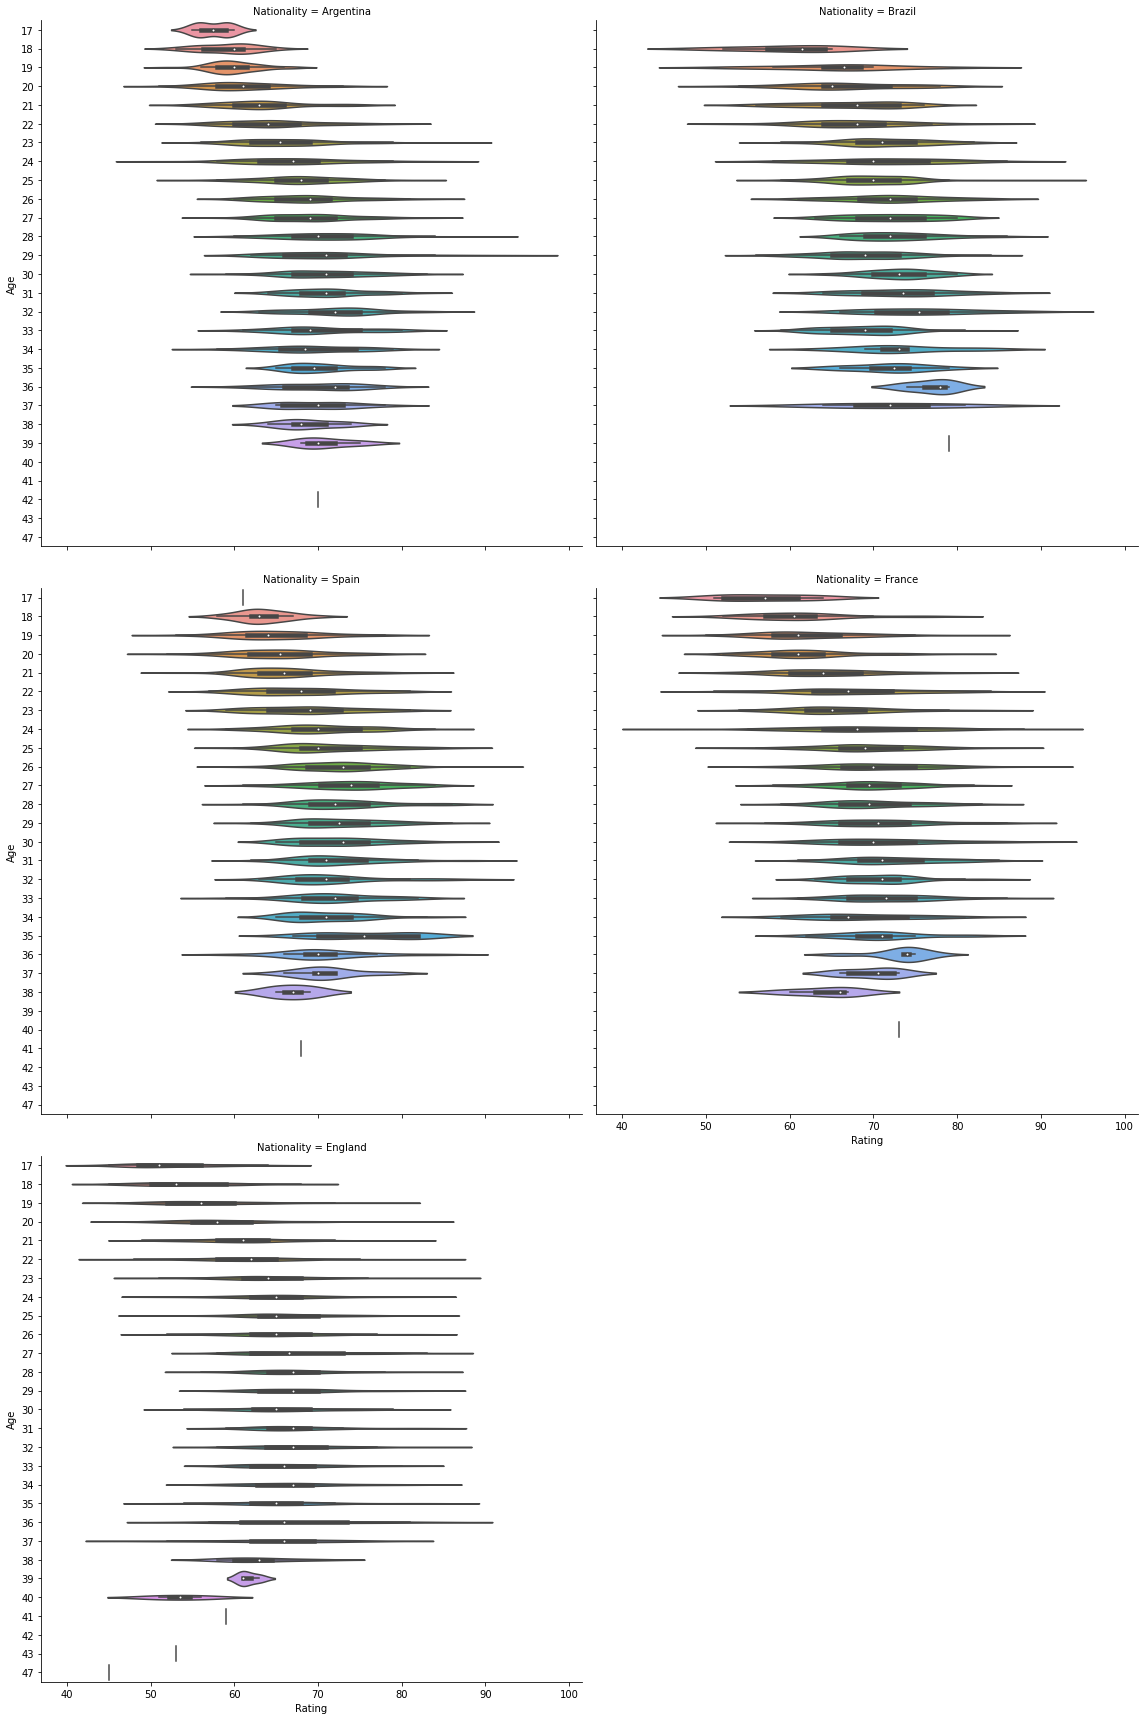

In [ ]:
#Show nationality level detail
sns.catplot(y='Age', x='Rating', orient='h', data=df[mask], kind='violin',
            col='Nationality', col_wrap=2,
               height=8, aspect=1)